# Analysis of results and playing with featuremaps  

### In order to train model for activity classification I used pre-trained model, trained on ImageNet. The next step was to apply transfer learning. What is it? The main idea is to use weights that were trained on ImageNet and change them a bit to let them learn from other dataset. Important to mention that we have to change learning rate too. It should be smaller for layers that are the same with original model and be heiger for new layers. Next step is fine-tuning hyperparameters.

### After fine-tuning various models and trying lots of learning rate policies, we got our best result with ***accuracy = 95%*** on test set, that is 10% of all MPII dataset. I have tried Adam, RMSProp and Momentum stochastic gradient optimization algorithms.
### The best optimization algorithm was ***Adam***, the best topology was GoogLeNet and my learning rate policy:
base_lr: 0.0005
lr_policy: "step"
stepsize: 2000

### All files for trainig models and my pre-trained weights you may find in the github repo.

You may find the plot of learning curves below:

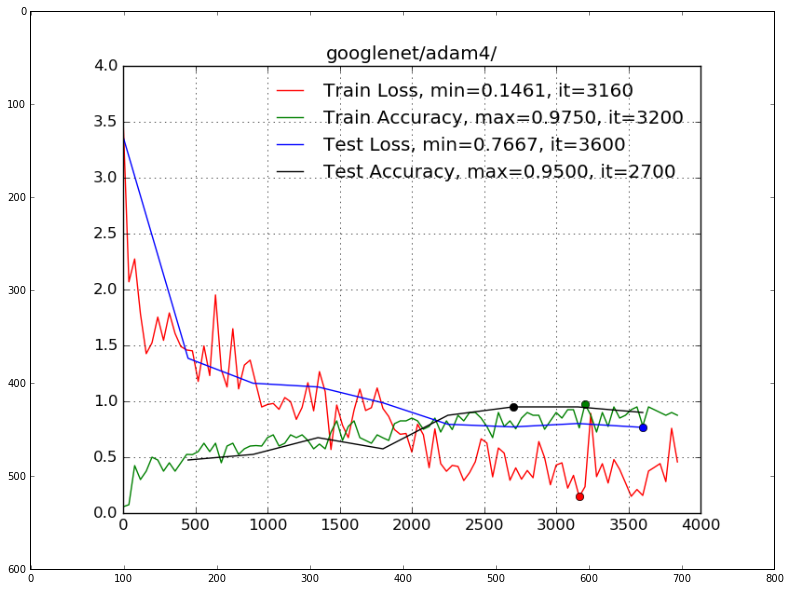

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = (18.0, 10.0)

learning_curves = mpimg.imread('/home/veronika/materials/cv/cv_organizer/googlenet/adam4/best.png')
plt.imshow(learning_curves)

Using the following function we can get features from defined layer for each features.

In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import caffe
import cv2

def probs_feats(img_path, deploy_path, weights_path, blob_name="pool5/7x7_s1"):
    channels = 3
    rows = 224
    cols = 224

    net = caffe.Net(deploy_path, weights_path, caffe.TEST)
    net.blobs['data'].reshape(1, channels, rows, cols)

    image = caffe.io.load_image(img_path)
    image = cv2.resize(image, (224, 224))
    image = image.swapaxes(0,2).swapaxes(1,2)
    image = image.reshape(1, channels, rows, cols)
    input_img = image.astype(float)
    net.blobs["data"].data[...] = input_img
    probs = net.forward()['prob'].flatten()
    feats = net.blobs[blob_name].data

    return list(probs), ([elem[0][0] for elem in feats[0].tolist()])

It was interesting for me to play with features values. I decided to plot covariance matrix for test set, that was sored by class. I applied the ***probs_feat*** function to all images from test set and using R ploted the matrixes. As it was expected features from almost last layes are pretty clustered!


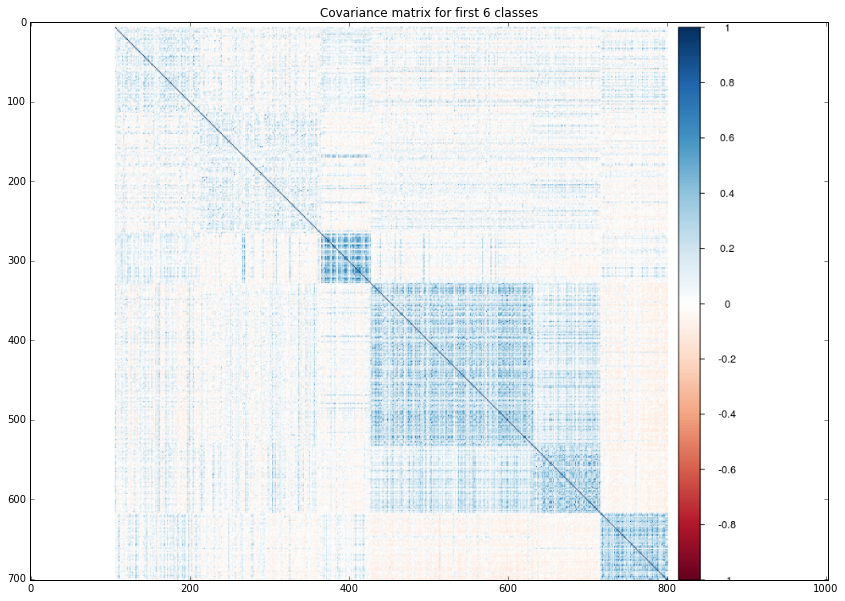

In [29]:
class0_6 = mpimg.imread('/home/veronika/materials/cv/cv_organizer/presentation/0_6.png')
plt.title("Covariance matrix for first 6 classes")
plt.imshow(class0_6)

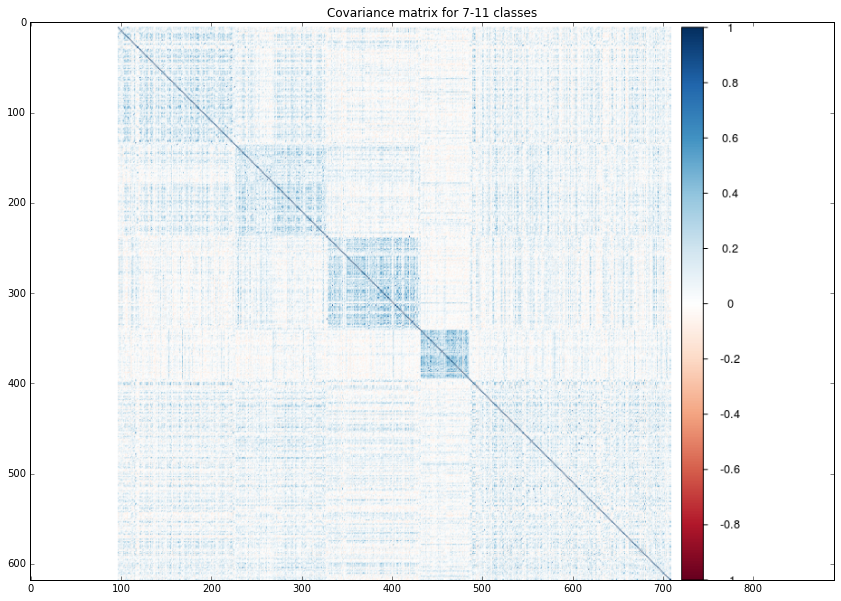

In [31]:
class7_11 = mpimg.imread('/home/veronika/materials/cv/cv_organizer/presentation/7_11.png')
plt.title("Covariance matrix for 7-11 classes")
plt.imshow(class7_11)

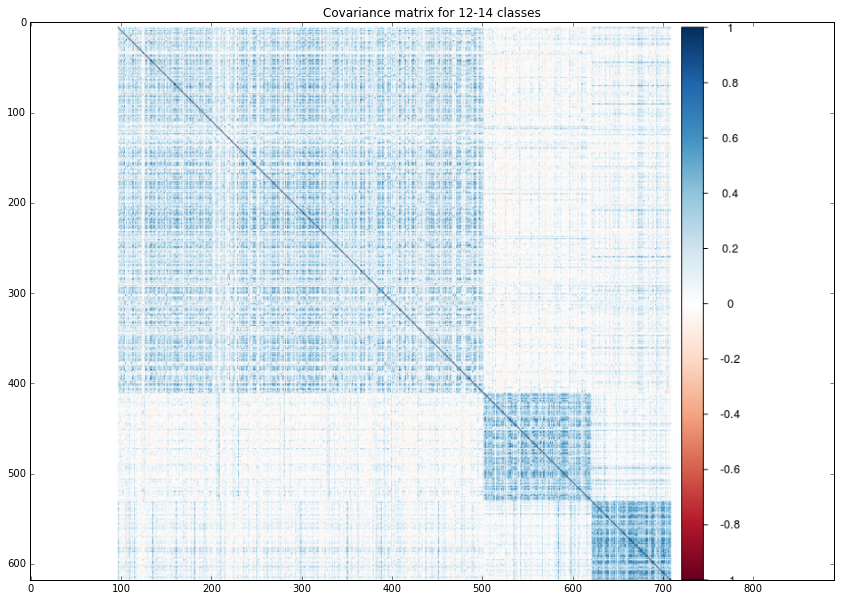

In [32]:
class12_14 = mpimg.imread('/home/veronika/materials/cv/cv_organizer/presentation/12_14.png')
plt.title("Covariance matrix for 12-14 classes")
plt.imshow(class12_14)

Using R I plotted confusion matrix of predicted and target values of test set.

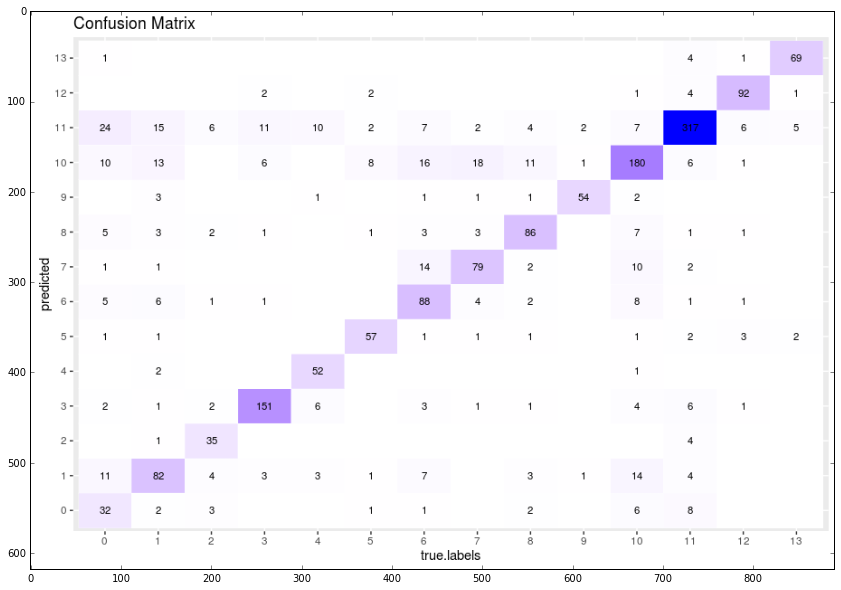

In [34]:
confusion_m = mpimg.imread('/home/veronika/materials/cv/cv_organizer/presentation/confmatrix.png')
plt.imshow(confusion_m)

The last but not least fact is that in order to prevent overfitting all classes were splited into stritified folders (to save the distribution between classes in train and test sets) before training the model.

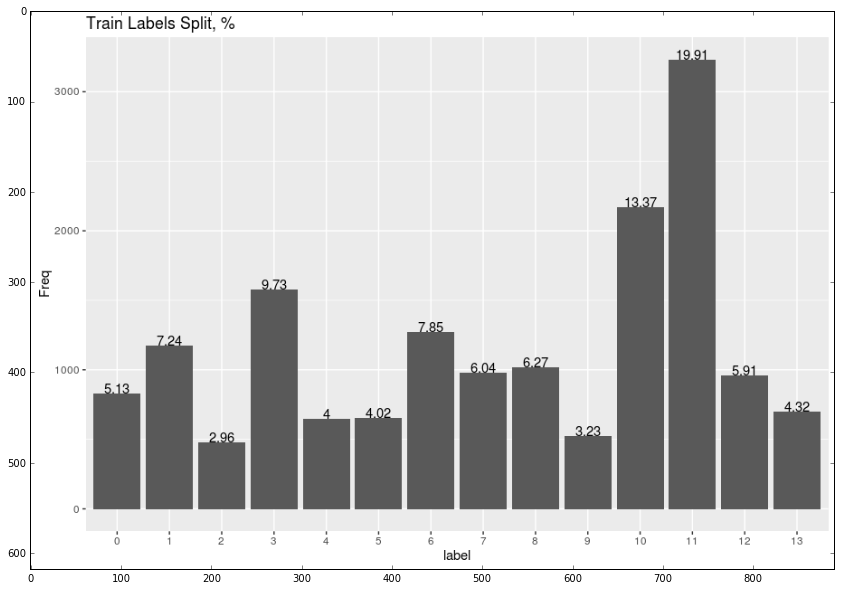

In [38]:
train_dist = mpimg.imread('/home/veronika/materials/cv/cv_organizer/presentation/train.png')
plt.imshow(train_dist)


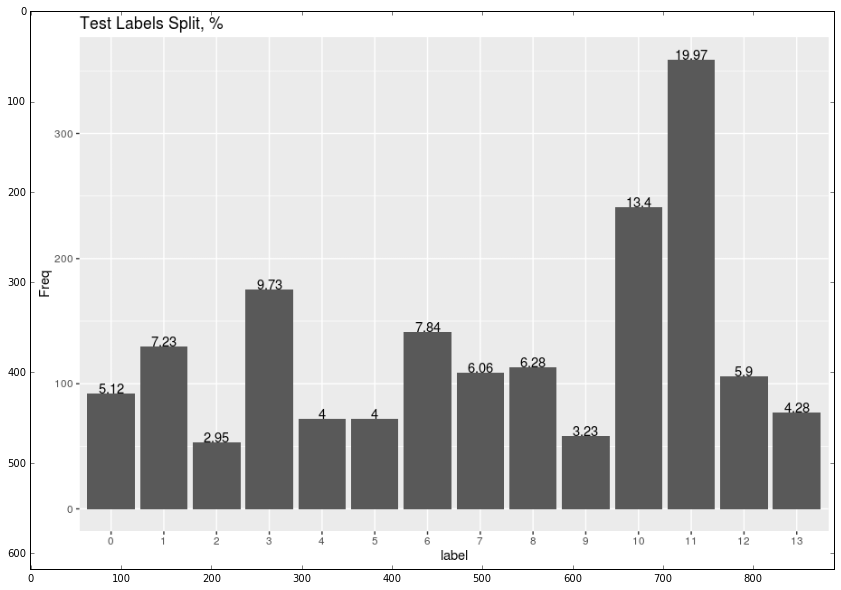

In [39]:
test_dist = mpimg.imread('/home/veronika/materials/cv/cv_organizer/presentation/test.png')
plt.imshow(test_dist)